In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import stats
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression


In [2]:
corr_file = "PdPPe_Corr_master.xlsx"

In [3]:
df = pd.read_excel(corr_file,
                       header=0,
                       index_col=False,
                       keep_default_na=True
                       )


df.head(5)

,New_Number,Old_Number,Log_Fluor,Diane_Abhi_Fluor,SMILES,Kraken_ID_API,kraken_ID_xlsx,vmin_vmin_boltz,vmin_r_boltz,fmo_e_homo_boltz,...,sterimol_burB5_boltz,sterimol_burB5_min,sterimol_burB5_max,sterimol_burB5_delta,sterimol_burB5_vburminconf,sterimol_burL_boltz,sterimol_burL_min,sterimol_burL_max,sterimol_burL_delta,sterimol_burL_vburminconf
0,1,1,0.107210,0.107210,Cc1ccccc1P(c1ccccc1C)c1ccccc1C,NaN,9,-0.043479,1.820164,-0.222589,...,6.042971,6.042803,6.210989,0.168186,6.210989,6.778337,6.776344,7.604455,0.828112,7.604455
1,2,2,0.296665,0.296665,O=S(=O)(O)c1cccc(P(c2ccccc2)c2ccccc2)c1,NaN,474,-0.037038,1.871216,-0.242356,...,6.497699,6.034963,7.308214,1.273251,6.037221,6.967081,6.949840,6.990305,0.040465,6.990305
2,3,3,0.154043,0.594393,C1N2CN3CN1CP(C2)C3,NaN,239,-0.047461,1.860160,-0.221150,...,3.511176,3.511176,3.511176,0.000000,3.511176,7.299284,7.299284,7.299284,0.000000,7.299284
3,4,5,0.012837,0.012837,c1coc(P(c2ccco2)c2ccco2)c1,NaN,54,-0.039828,1.919713,-0.227681,...,5.934360,5.835709,6.026880,0.191171,5.863930,6.779832,6.518659,6.858913,0.340254,6.697037
4,5,7,0.181844,0.181844,O=C(O)c1ccc(P(c2ccc(C(=O)O)cc2)c2ccc(C(F)(F)F)...,NaN,741,-0.026401,1.900154,-0.254050,...,6.034069,6.029424,6.034070,0.004646,6.034070,6.910345,6.910344,6.919218,0.008874,6.910344


In [4]:
df = df.drop(['Old_Number','Diane_Abhi_Fluor','Kraken_ID_API','kraken_ID_xlsx','SMILES'], axis=1)

In [5]:
df.head(5)

,New_Number,Log_Fluor,vmin_vmin_boltz,vmin_r_boltz,fmo_e_homo_boltz,fmo_e_lumo_boltz,fmo_mu_boltz,fmo_eta_boltz,fmo_omega_boltz,somo_ra_boltz,...,sterimol_burB5_boltz,sterimol_burB5_min,sterimol_burB5_max,sterimol_burB5_delta,sterimol_burB5_vburminconf,sterimol_burL_boltz,sterimol_burL_min,sterimol_burL_max,sterimol_burL_delta,sterimol_burL_vburminconf
0,1,0.107210,-0.043479,1.820164,-0.222589,-0.028099,-0.125344,0.194489,0.040391,0.058946,...,6.042971,6.042803,6.210989,0.168186,6.210989,6.778337,6.776344,7.604455,0.828112,7.604455
1,2,0.296665,-0.037038,1.871216,-0.242356,-0.059912,-0.151134,0.182444,0.062602,0.034859,...,6.497699,6.034963,7.308214,1.273251,6.037221,6.967081,6.949840,6.990305,0.040465,6.990305
2,3,0.154043,-0.047461,1.860160,-0.221150,0.032800,-0.094175,0.253950,0.017462,0.137370,...,3.511176,3.511176,3.511176,0.000000,3.511176,7.299284,7.299284,7.299284,0.000000,7.299284
3,4,0.012837,-0.039828,1.919713,-0.227681,-0.026131,-0.126906,0.201549,0.039969,0.074128,...,5.934360,5.835709,6.026880,0.191171,5.863930,6.779832,6.518659,6.858913,0.340254,6.697037
4,5,0.181844,-0.026401,1.900154,-0.254050,-0.079880,-0.166965,0.174170,0.080029,0.005780,...,6.034069,6.029424,6.034070,0.004646,6.034070,6.910345,6.910344,6.919218,0.008874,6.910344


In [6]:
y = df[["Log_fluor"]]
X = df[["vmin_vmin_boltz"]]

regressor = LinearRegression()

regressor.fit(X,y)

plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color = 'blue')
plt.xlabel('vmin_vmin_bolz')
plt.ylabel('log_fluor_expr')
plt.show()

KeyError: "None of [Index(['Log_fluor'], dtype='object')] are in the [columns]"

vbur_vtot_boltz
result: 1
R_squared: 0.0009712886242346785


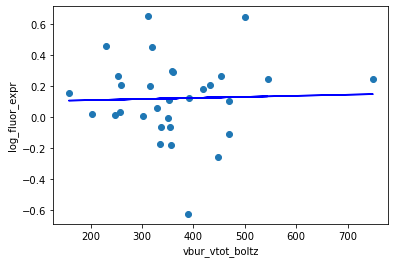


--------------------------------------------------------

vbur_ratio_vbur_vtot_boltz
result: 2
R_squared: 0.009231835348615047


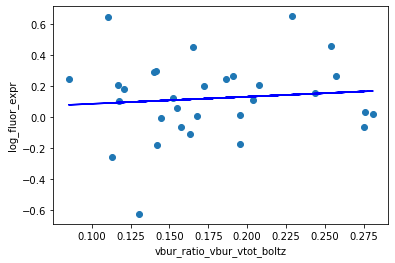


--------------------------------------------------------

dipolemoment_vburminconf
result: 3
R_squared: 0.03534319848641343


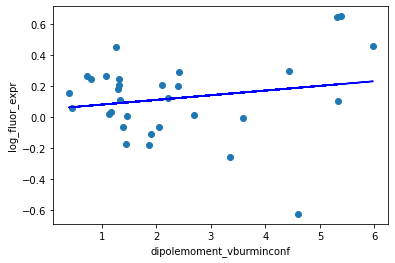


--------------------------------------------------------

qpole_amp_vburminconf
result: 4
R_squared: 0.21977510039464743


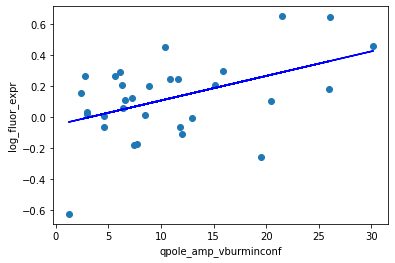


--------------------------------------------------------

qpoletens_xx_vburminconf
result: 5
R_squared: 0.2840487563832227


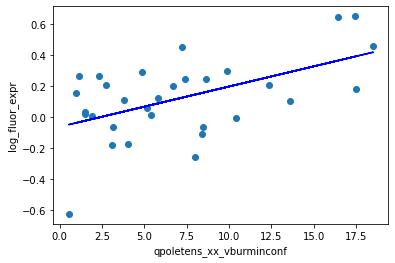


--------------------------------------------------------

qpoletens_yy_vburminconf
result: 6
R_squared: 0.0866733369308813


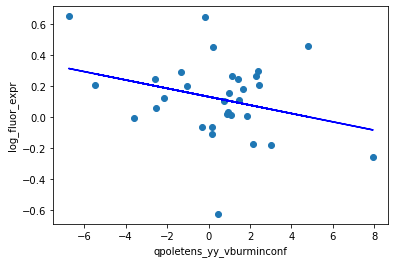


--------------------------------------------------------

qpoletens_zz_vburminconf
result: 7
R_squared: 0.15450480500766506


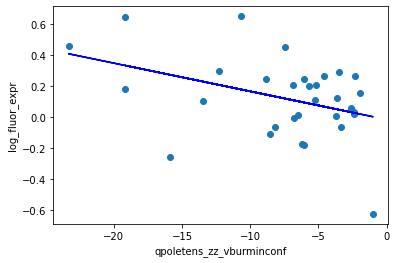


--------------------------------------------------------

pyr_P_vburminconf
result: 8
R_squared: 0.00022194973972300414


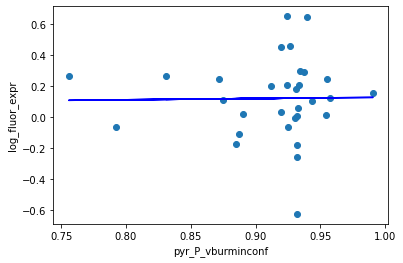


--------------------------------------------------------

pyr_alpha_vburminconf
result: 9
R_squared: 0.0013478014678204309


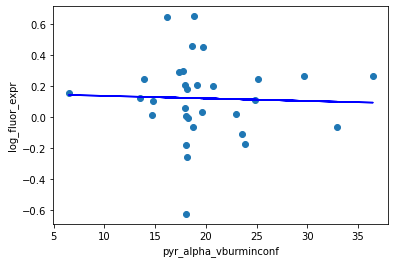


--------------------------------------------------------

vbur_vbur_boltz
result: 10
R_squared: 0.005192991624598964


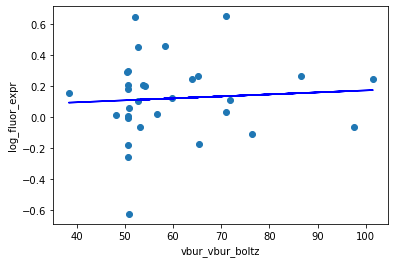


--------------------------------------------------------

vbur_vbur_min
result: 11
R_squared: 0.0028243613123648537


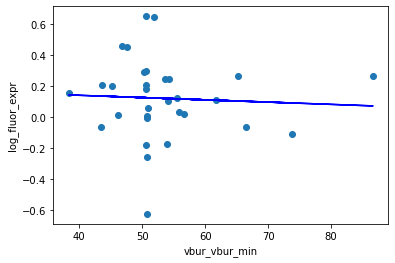


--------------------------------------------------------

vbur_vbur_max
result: 12
R_squared: 0.04323910933889452


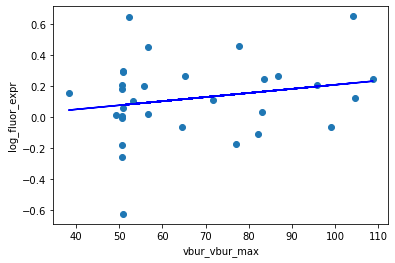


--------------------------------------------------------

vbur_vbur_delta
result: 13
R_squared: 0.06655355865656987


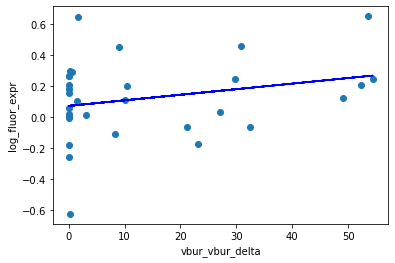


--------------------------------------------------------

vbur_vbur_vburminconf
result: 14
R_squared: 0.0034606897545004234


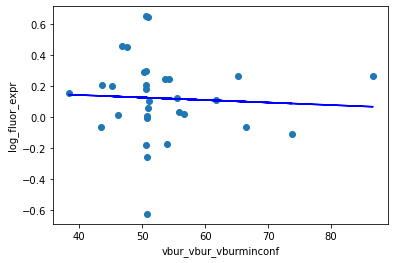


--------------------------------------------------------

vbur_qvbur_min_boltz
result: 15
R_squared: 0.00024014663825455695


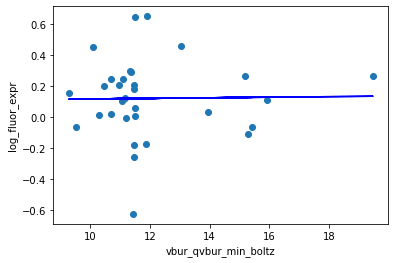


--------------------------------------------------------

vbur_qvbur_min_min
result: 16
R_squared: 0.004002195988064727


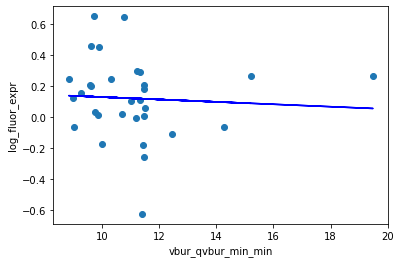


--------------------------------------------------------

vbur_qvbur_min_max
result: 17
R_squared: 0.04164556690742949


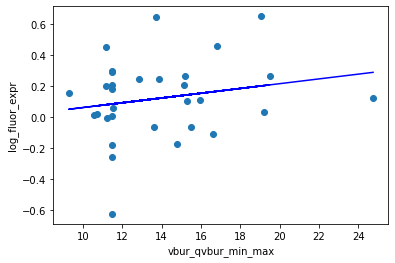


--------------------------------------------------------

vbur_qvbur_min_delta
result: 18
R_squared: 0.040106918429395844


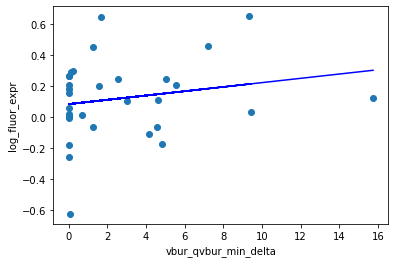


--------------------------------------------------------

vbur_qvbur_min_vburminconf
result: 19
R_squared: 0.0034197982413105565


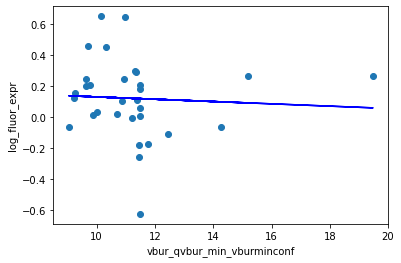


--------------------------------------------------------

vbur_qvbur_max_boltz
result: 20
R_squared: 0.004074420314185145


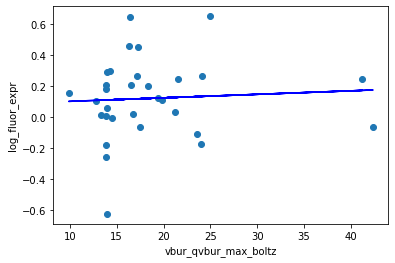


--------------------------------------------------------

vbur_qvbur_max_min
result: 21
R_squared: 0.004051102352754632


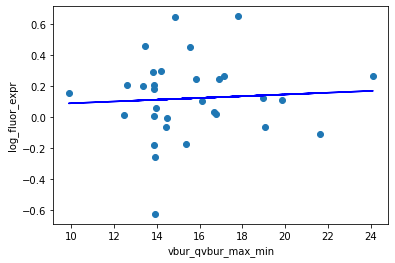


--------------------------------------------------------

vbur_qvbur_max_max
result: 22
R_squared: 0.03383911494996239


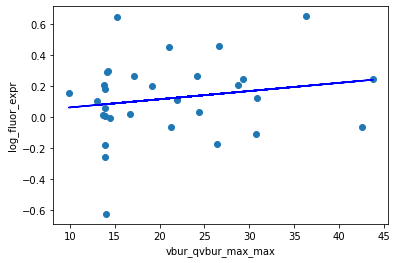


--------------------------------------------------------

vbur_qvbur_max_delta
result: 23
R_squared: 0.02503386522046669


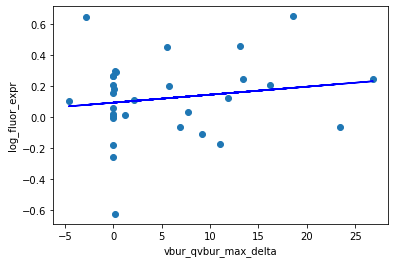


--------------------------------------------------------

vbur_qvbur_max_vburminconf
result: 24
R_squared: 6.148294386831843e-05


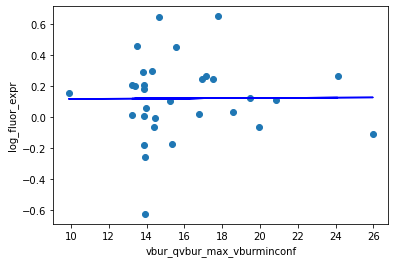


--------------------------------------------------------

vbur_qvtot_min_boltz
result: 25
R_squared: 0.025235864251917373


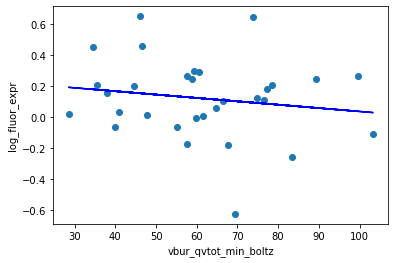


--------------------------------------------------------

vbur_qvtot_min_min
result: 26
R_squared: 0.061156973922359525


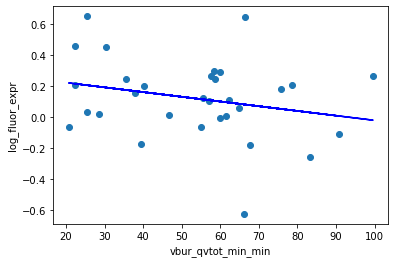


--------------------------------------------------------

vbur_qvtot_min_max
result: 27
R_squared: 0.0011244552572270416


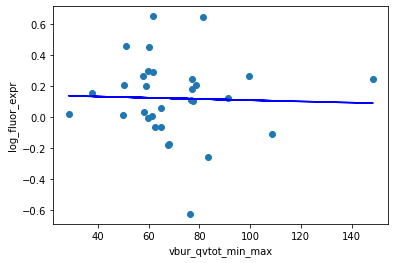


--------------------------------------------------------

vbur_qvtot_min_delta
result: 28
R_squared: 0.04037744416362765


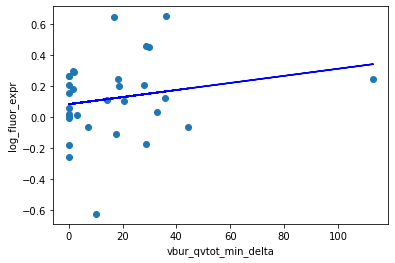


--------------------------------------------------------

vbur_qvtot_min_vburminconf
result: 29
R_squared: 0.030492857932127526


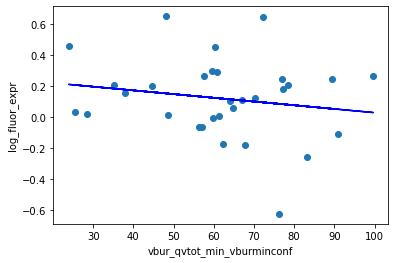


--------------------------------------------------------

vbur_qvtot_max_boltz
result: 30
R_squared: 0.006947024854293327


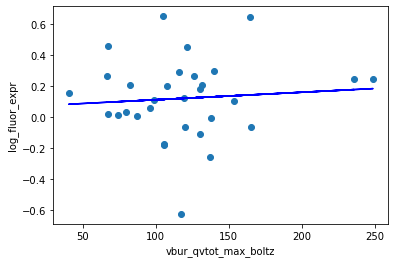


--------------------------------------------------------

vbur_qvtot_max_min
result: 31
R_squared: 0.00371984721153773


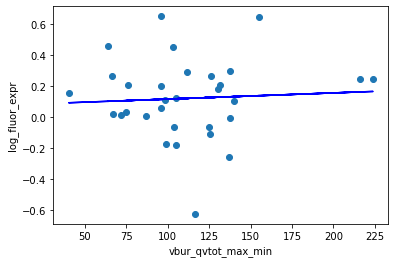


--------------------------------------------------------

vbur_qvtot_max_max
result: 32
R_squared: 0.017943526200896898


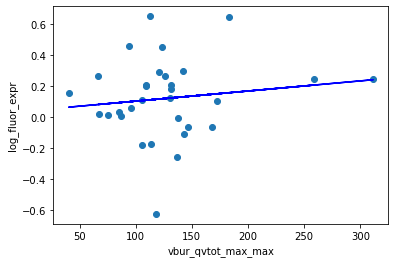


--------------------------------------------------------

vbur_qvtot_max_delta
result: 33
R_squared: 0.03869180258957727


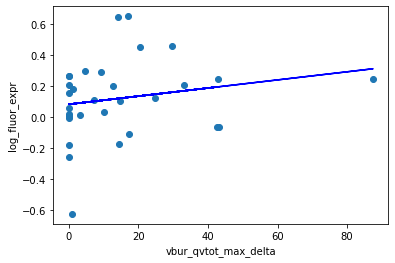


--------------------------------------------------------

vbur_qvtot_max_vburminconf
result: 34
R_squared: 0.008789463116807283


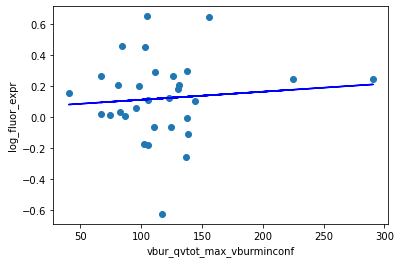


--------------------------------------------------------

vbur_max_delta_qvbur_boltz
result: 35
R_squared: 0.006625827402208961


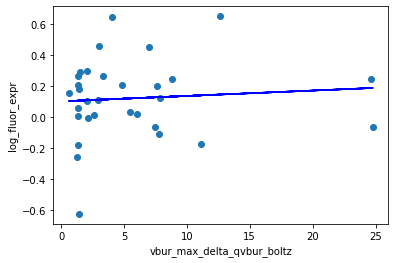


--------------------------------------------------------

vbur_max_delta_qvbur_min
result: 36
R_squared: 0.07756315916376455


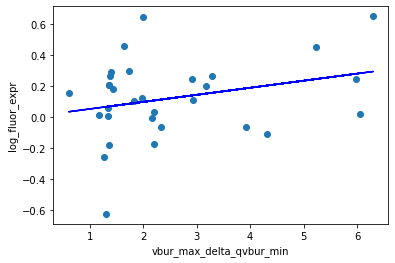


--------------------------------------------------------

vbur_max_delta_qvbur_max
result: 37
R_squared: 0.03395396736304834


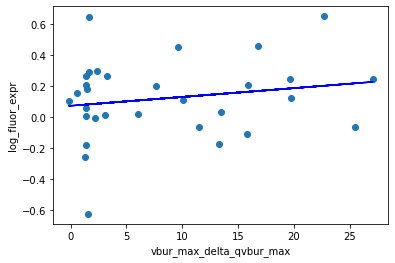


--------------------------------------------------------

vbur_max_delta_qvbur_delta
result: 38
R_squared: 0.019634120321721182


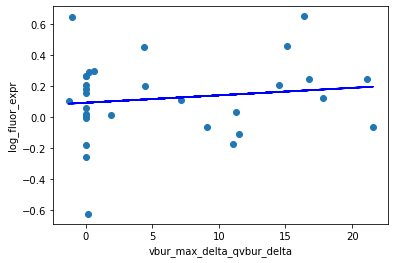


--------------------------------------------------------

vbur_max_delta_qvbur_vburminconf
result: 39
R_squared: 0.009719413086592632


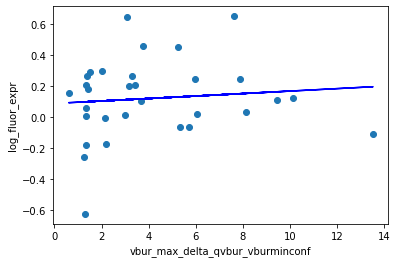


--------------------------------------------------------

vbur_max_delta_qvtot_boltz
result: 40
R_squared: 0.01742948749110973


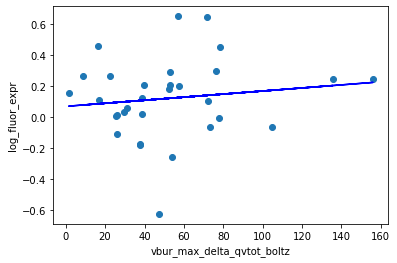


--------------------------------------------------------

vbur_max_delta_qvtot_min
result: 41
R_squared: 0.006975379667464421


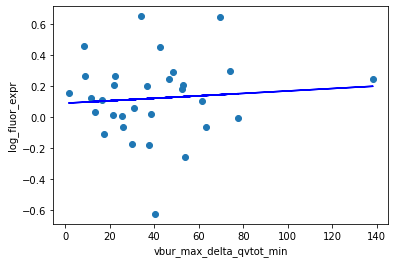


--------------------------------------------------------

vbur_max_delta_qvtot_max
result: 42
R_squared: 0.034578110667851436


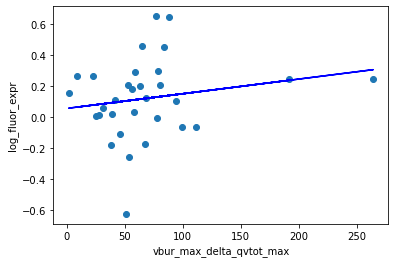


--------------------------------------------------------

vbur_max_delta_qvtot_delta
result: 43
R_squared: 0.025358807972404085


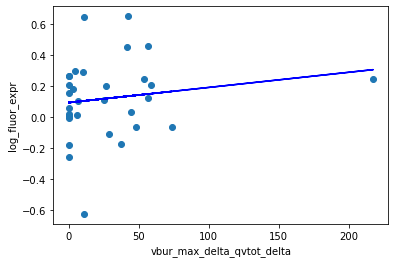


--------------------------------------------------------

vbur_max_delta_qvtot_vburminconf
result: 44
R_squared: 0.03749869734092515


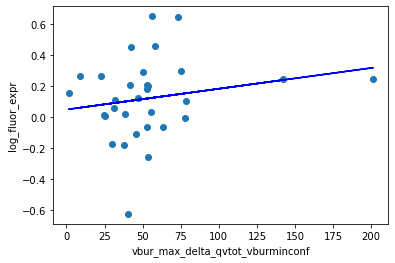


--------------------------------------------------------

vbur_ovbur_min_boltz
result: 45
R_squared: 0.00633757726360118


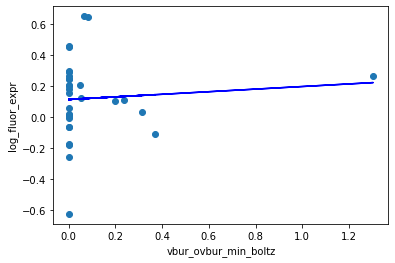


--------------------------------------------------------

vbur_ovbur_min_min
result: 46
R_squared: 0.011325096288256398


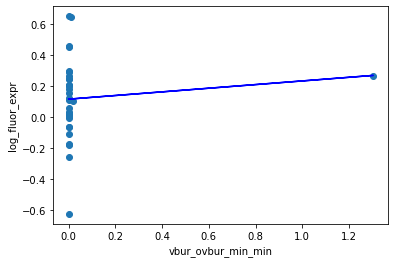


--------------------------------------------------------

vbur_ovbur_min_max
result: 47
R_squared: 0.08366026173538321


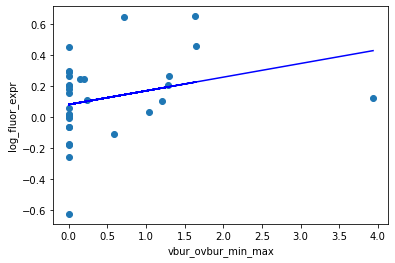


--------------------------------------------------------

vbur_ovbur_min_delta
result: 48
R_squared: 0.07036012935426805


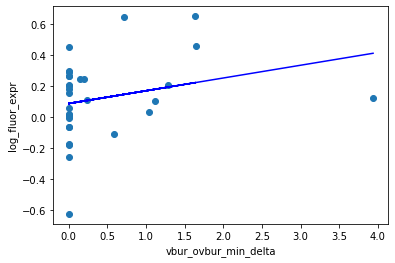


--------------------------------------------------------

vbur_ovbur_min_vburminconf
result: 49
R_squared: 0.015699970864035184


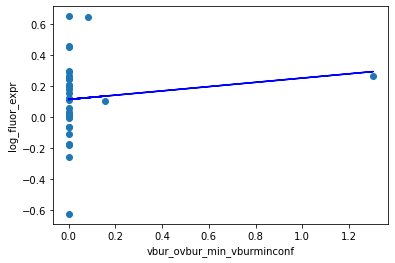


--------------------------------------------------------

vbur_ovbur_max_boltz
result: 50
R_squared: 0.014510200770079473


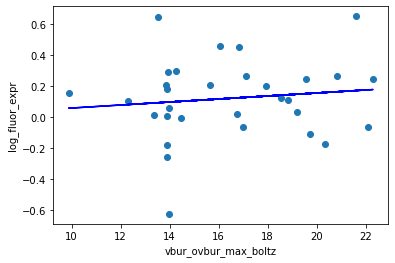


--------------------------------------------------------

vbur_ovbur_max_min
result: 51
R_squared: 0.007187858475854236


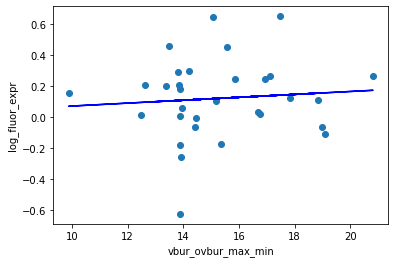


--------------------------------------------------------

vbur_ovbur_max_max
result: 52
R_squared: 0.021148236790348385


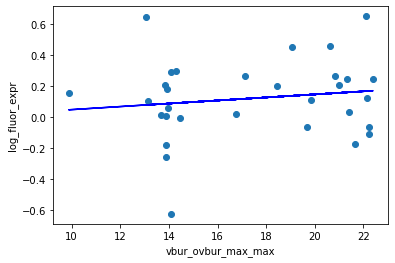


--------------------------------------------------------

vbur_ovbur_max_delta
result: 53
R_squared: 0.034579559571499385


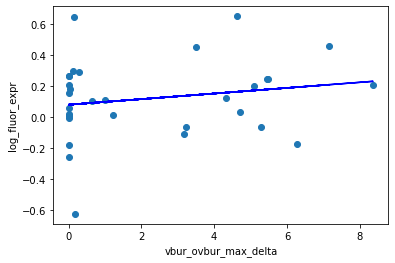


--------------------------------------------------------

vbur_ovbur_max_vburminconf
result: 54
R_squared: 0.0025635474050687


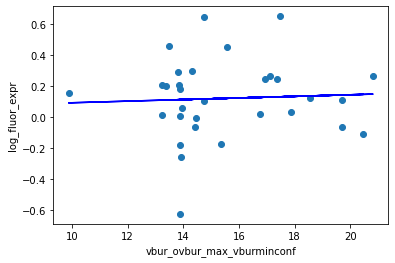


--------------------------------------------------------

vbur_ovtot_min_boltz
result: 55
R_squared: 0.026129158434300193


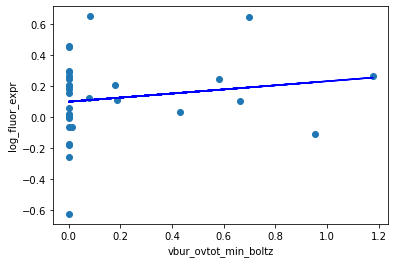


--------------------------------------------------------

vbur_ovtot_min_min
result: 56
R_squared: 0.019353060003387323


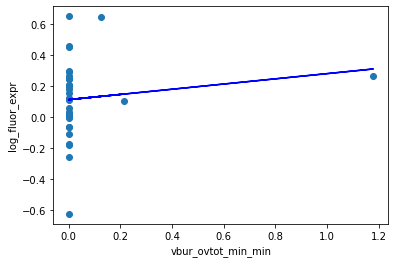


--------------------------------------------------------

vbur_ovtot_min_max
result: 57
R_squared: 0.1084651950360408


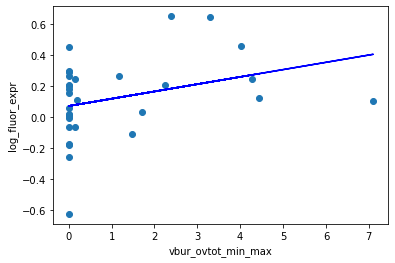


--------------------------------------------------------

vbur_ovtot_min_delta
result: 58
R_squared: 0.14587658006460935


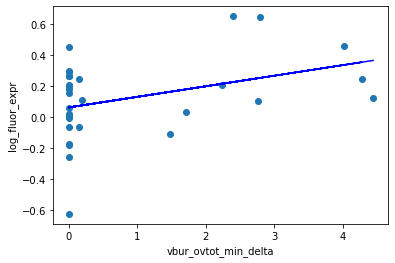


--------------------------------------------------------

vbur_ovtot_min_vburminconf
result: 59
R_squared: 0.026201624593866324


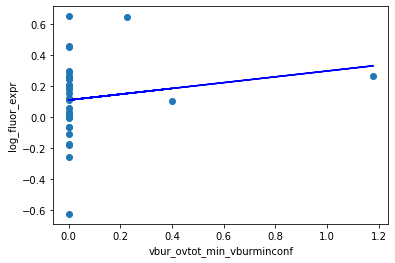


--------------------------------------------------------

vbur_ovtot_max_boltz
result: 60
R_squared: 0.006154954292661219


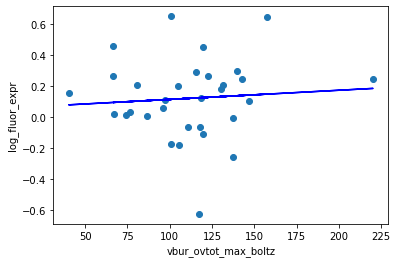


--------------------------------------------------------

vbur_ovtot_max_min
result: 61
R_squared: 0.0012856766321941437


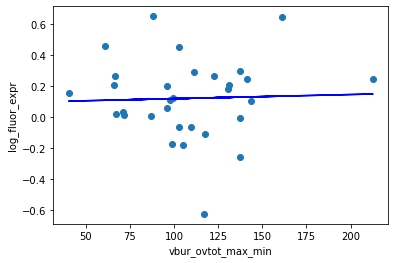


--------------------------------------------------------

vbur_ovtot_max_max
result: 62
R_squared: 0.02433900187405924


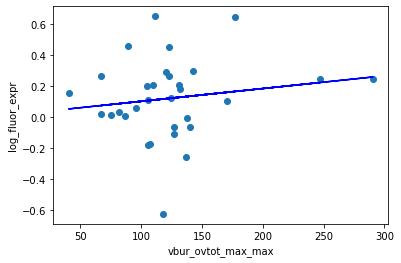


--------------------------------------------------------

vbur_ovtot_max_delta
result: 63
R_squared: 0.06952051313681118


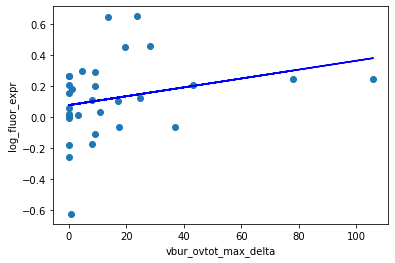


--------------------------------------------------------

vbur_ovtot_max_vburminconf
result: 64
R_squared: 0.014544727176490468


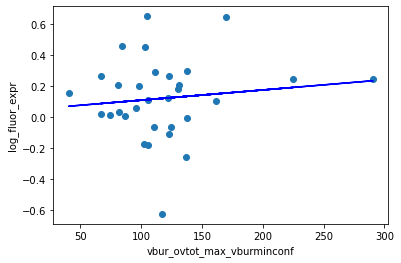


--------------------------------------------------------

vbur_near_vbur_boltz
result: 65
R_squared: 0.010205789825478928


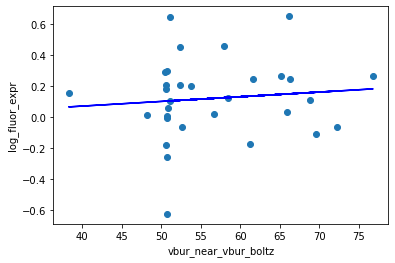


--------------------------------------------------------

vbur_near_vbur_min
result: 66
R_squared: 0.0033565595318545416


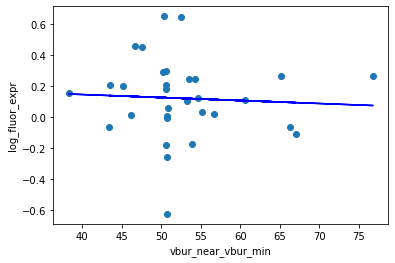


--------------------------------------------------------

vbur_near_vbur_max
result: 67
R_squared: 0.02376204228836598


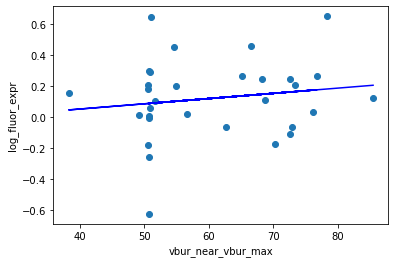


--------------------------------------------------------

vbur_near_vbur_delta
result: 68
R_squared: 0.05570239096820251


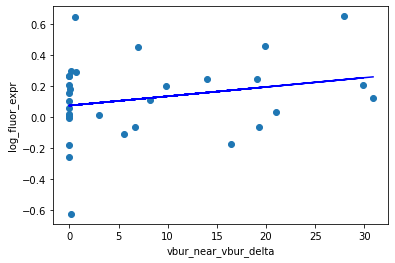


--------------------------------------------------------

vbur_near_vbur_vburminconf
result: 69
R_squared: 0.003559629196901448


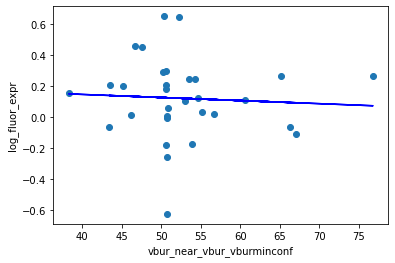


--------------------------------------------------------

vbur_far_vbur_boltz
result: 70
R_squared: 0.0013510037848634138


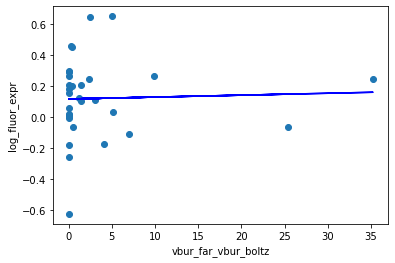


--------------------------------------------------------

vbur_far_vbur_min
result: 71
R_squared: 0.002303203580821478


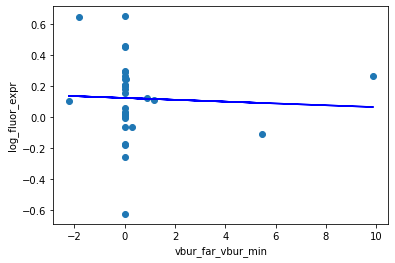


--------------------------------------------------------

vbur_far_vbur_max
result: 72
R_squared: 0.05923638315784174


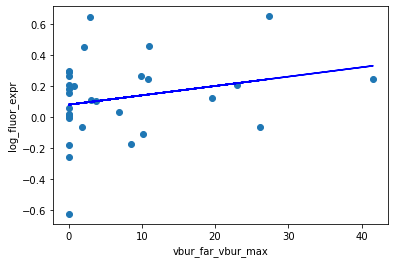


--------------------------------------------------------

vbur_far_vbur_delta
result: 73
R_squared: 0.05651975015667943


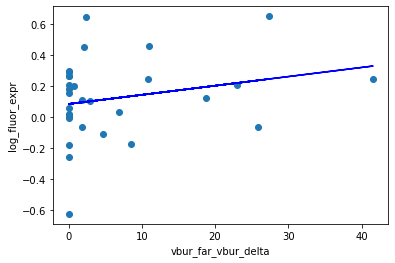


--------------------------------------------------------

vbur_far_vbur_vburminconf
result: 74
R_squared: 0.0013476019137361739


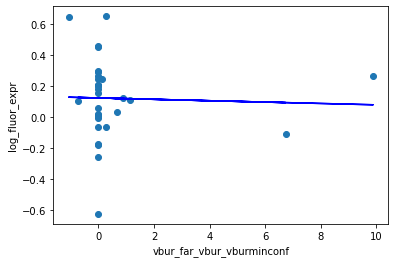


--------------------------------------------------------

vbur_near_vtot_boltz
result: 75
R_squared: 0.00011626592453128914


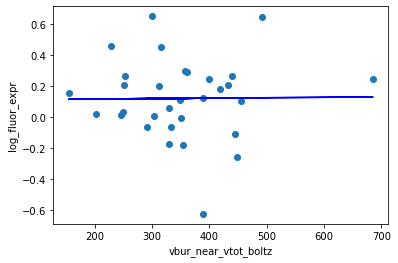


--------------------------------------------------------

vbur_near_vtot_min
result: 76
R_squared: 0.0008584505627363681


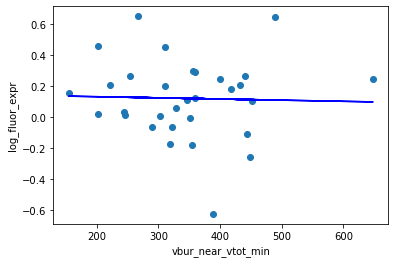


--------------------------------------------------------

vbur_near_vtot_max
result: 77
R_squared: 0.000484912406600313


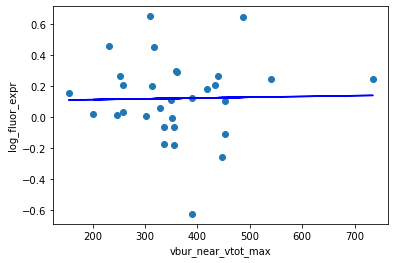


--------------------------------------------------------

vbur_near_vtot_delta
result: 78
R_squared: 0.04275553920467823


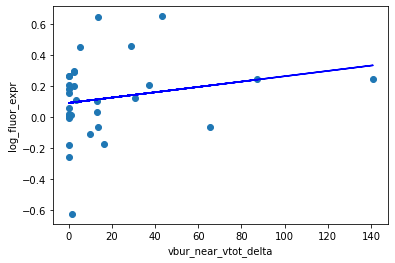


--------------------------------------------------------

vbur_near_vtot_vburminconf
result: 79
R_squared: 0.0006028699013983507


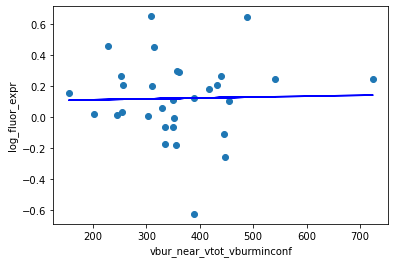


--------------------------------------------------------

vbur_far_vtot_boltz
result: 80
R_squared: 0.005331156683396454


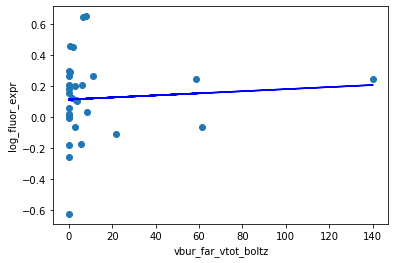


--------------------------------------------------------

vbur_far_vtot_min
result: 81
R_squared: 0.00028501643445277836


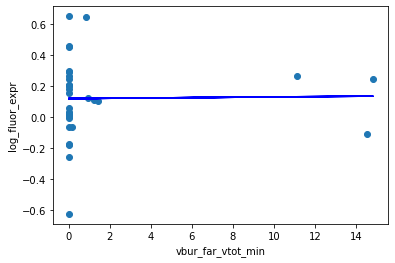


--------------------------------------------------------

vbur_far_vtot_max
result: 82
R_squared: 0.03481916162216403


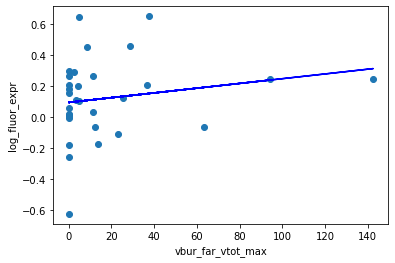


--------------------------------------------------------

vbur_far_vtot_delta
result: 83
R_squared: 0.03542604688904316


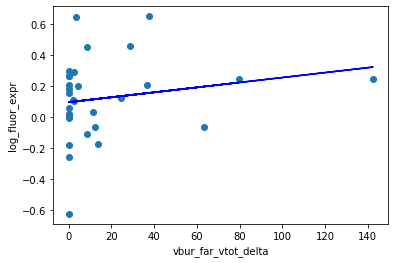


--------------------------------------------------------

vbur_far_vtot_vburminconf
result: 84
R_squared: 0.00010358428327950087


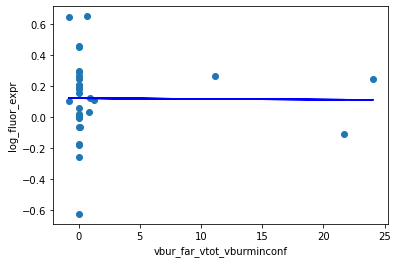


--------------------------------------------------------

sterimol_B1_vburminconf
result: 85
R_squared: 0.08890167125352588


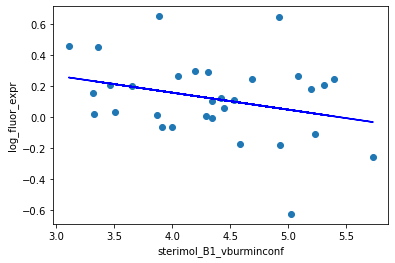


--------------------------------------------------------

sterimol_B5_vburminconf
result: 86
R_squared: 0.030982353993956213


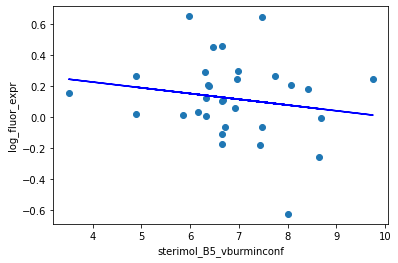


--------------------------------------------------------

sterimol_L_vburminconf
result: 87
R_squared: 0.04306831718543325


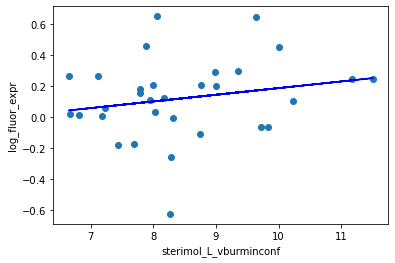


--------------------------------------------------------

sterimol_burB1_vburminconf
result: 88
R_squared: 0.040681027917075396


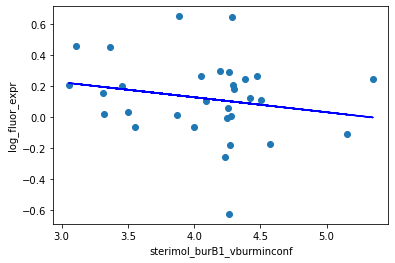


--------------------------------------------------------

sterimol_burB5_vburminconf
result: 89
R_squared: 0.0019427351646184032


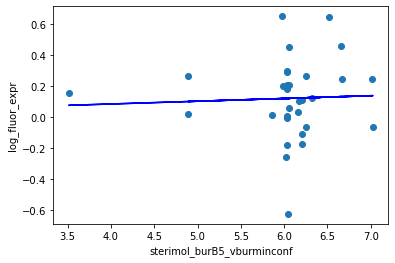


--------------------------------------------------------

sterimol_burL_vburminconf
result: 90
R_squared: 0.07194563570149737


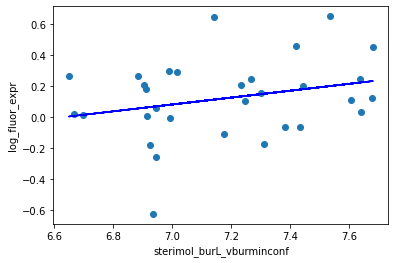


--------------------------------------------------------

vbur_vtot_boltz: 0.0009712886242346785
vbur_ratio_vbur_vtot_boltz: 0.009231835348615047
dipolemoment_vburminconf: 0.03534319848641343
qpole_amp_vburminconf: 0.21977510039464743
qpoletens_xx_vburminconf: 0.2840487563832227
qpoletens_yy_vburminconf: 0.0866733369308813
qpoletens_zz_vburminconf: 0.15450480500766506
pyr_P_vburminconf: 0.00022194973972300414
pyr_alpha_vburminconf: 0.0013478014678204309
vbur_vbur_boltz: 0.005192991624598964
vbur_vbur_min: 0.0028243613123648537
vbur_vbur_max: 0.04323910933889452
vbur_vbur_delta: 0.06655355865656987
vbur_vbur_vburminconf: 0.0034606897545004234
vbur_qvbur_min_boltz: 0.00024014663825455695
vbur_qvbur_min_min: 0.004002195988064727
vbur_qvbur_min_max: 0.04164556690742949
vbur_qvbur_min_delta: 0.040106918429395844
vbur_qvbur_min_vburminconf: 0.0034197982413105565
vbur_qvbur_max_boltz: 0.004074420314185145
vbur_qvbur_max_min: 0.004051102352754632
vbur_qvbur_max_max: 0.03383911494996239
vbur_q

In [9]:
i = 0
r_dict = {}
labels = ['1','2','3','5','7','8','9','13','15','18','19','21','23','25','34','D','E','F','G','H']
for (columnName, columnData) in df.iteritems():
    y = df[["Log_Fluor"]]
    X = df[[columnName]]
    if "vbur" in columnName:
        i+=1
        regressor = LinearRegression()
        regressor.fit(X,y)
        r_squared = regressor.score(X, y)
        r_dict[columnName] = r_squared
        print(columnName)
        print('result:',i)
        print("R_squared:",r_squared)
        plt.scatter(X, y)
        plt.plot(X, regressor.predict(X), color = 'blue')
        plt.xlabel(columnName)
        plt.ylabel('log_fluor_expr')
        plt.show()
        print("\n--------------------------------------------------------\n")

for key,value in r_dict.items():
        print(f"{key}: {value}")
        